## Data Discovering

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import xgboost as xgb

plt.style.use("ggplot")

In [190]:
df = pd.read_csv("data/heart.csv")

In [191]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [193]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [194]:
continuous_cols = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
cat_cols = df.drop(columns=continuous_cols.columns)

In [195]:
continuous_cols.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [196]:
def categorical_describe(series):
    """
    Function to describe categorical data in a Series.
    This function returns the count of unique values, the most common values, and their frequencies.
    """
    unique_values = series.unique()
    most_common_values = series.value_counts().head()
    return pd.Series({
        'unique_values_count': len(unique_values),
        'most_common_values': most_common_values.index.tolist(),
        'most_common_values_count': most_common_values.tolist()
    })

In [197]:
cat_data_description = cat_cols.apply(categorical_describe)
cat_data_description

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
unique_values_count,2,4,2,3,2,3,5,4,2
most_common_values,"[1, 0]","[0, 2, 1, 3]","[0, 1]","[1, 0, 2]","[0, 1]","[1, 2, 0]","[0, 1, 2, 3, 4]","[2, 3, 1, 0]","[1, 0]"
most_common_values_count,"[713, 312]","[497, 284, 167, 77]","[872, 153]","[513, 497, 15]","[680, 345]","[482, 469, 74]","[578, 226, 134, 69, 18]","[544, 410, 64, 7]","[526, 499]"


## Data Cleaning

In [198]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [199]:
df.isna().sum().max()

0

In [200]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [201]:
df = df.drop_duplicates()

## Feature Analysis

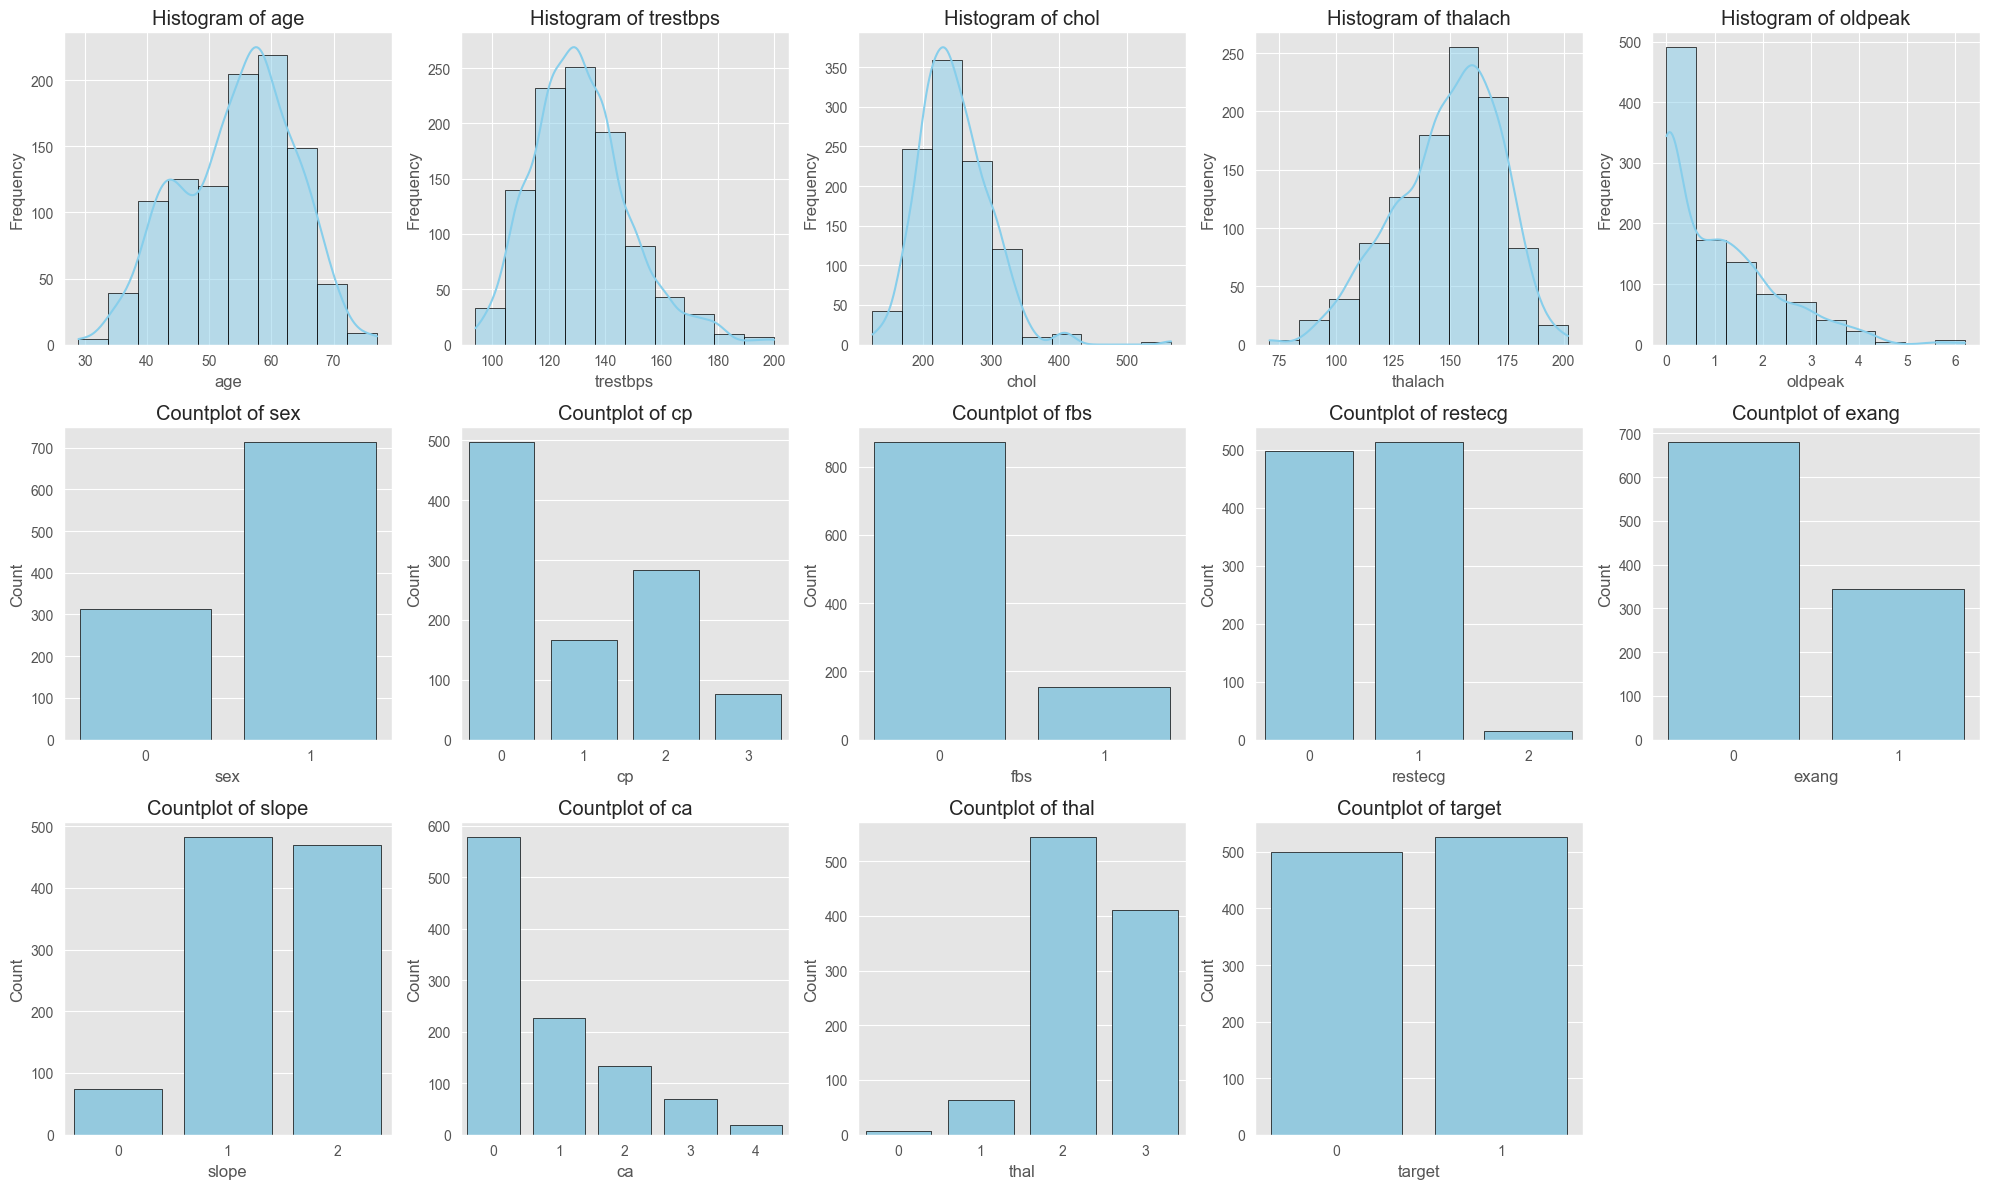

In [202]:
# Create subplots grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Get column names from continuous_cols DataFrame
continuous_column_names = continuous_cols.columns
cat_column_names = cat_cols.columns

# Iterate over each continuous column
for i, column in enumerate(continuous_column_names):
    # Calculate row and column indices
    row = i // 5
    col = i % 5

    # Create histogram for the current continuous column
    sns.histplot(data=continuous_cols[column], bins=10, color='skyblue', kde=True, edgecolor='black', ax=axes[row, col])

    # Set labels and title for the current subplot
    axes[row, col].set_xlabel(f'{column}')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}')

# Iterate over each categorical column
for i, column in enumerate(cat_column_names, start=len(continuous_column_names)):
    # Calculate row and column indices
    row = i // 5
    col = i % 5

    # Create countplot for the current categorical column
    sns.countplot(data=cat_cols, x=column, ax=axes[row, col], color='skyblue', edgecolor='black')

    # Set labels and title for the current subplot
    axes[row, col].set_xlabel(f'{column}')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Countplot of {column}')

# Hide unnecessary subplots
for i in range(len(continuous_column_names) + len(cat_column_names), len(axes.flat)):
    axes.flatten()[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [203]:
df_corr = df.corr()

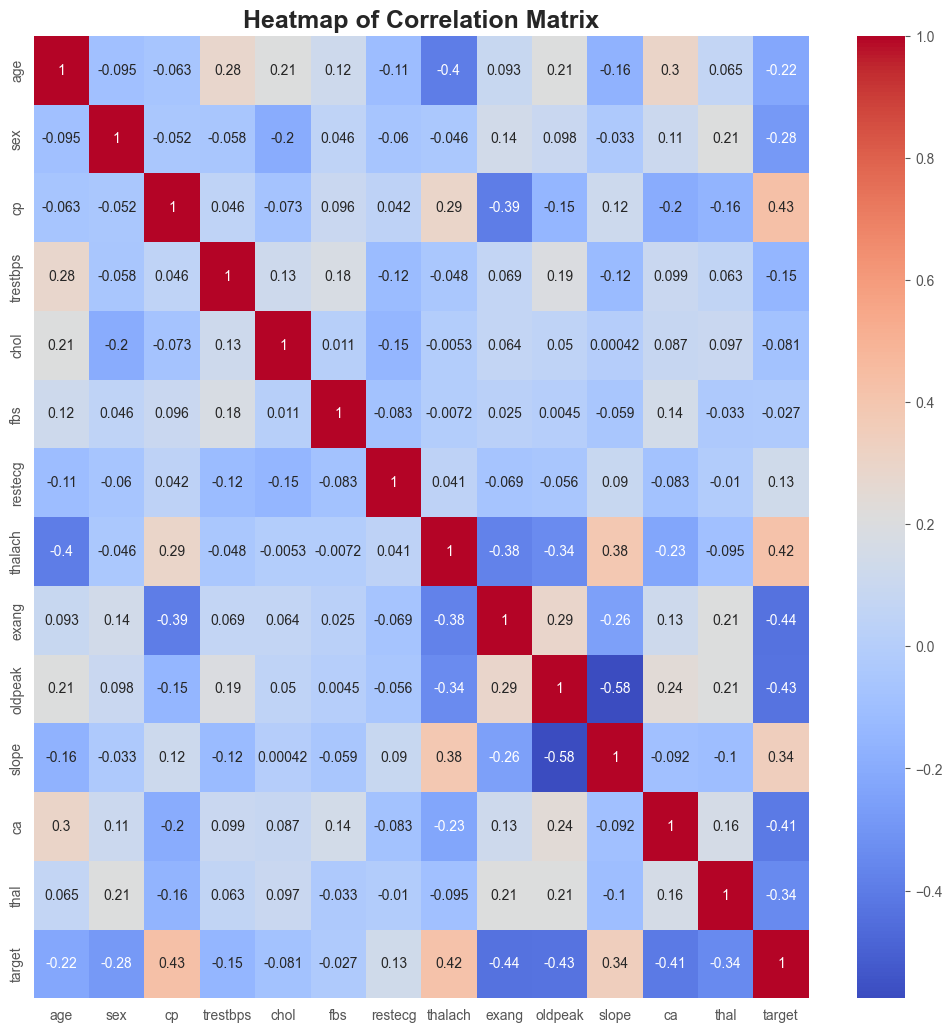

In [204]:
plt.figure(figsize=(12.5, 12.5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix", fontsize=18, fontweight='bold')
plt.show()

# Data Modeling

In [205]:
X = df.drop('target', axis=1)
y = df['target']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
pipelines = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'Naive Bayes': Pipeline([('clf', GaussianNB())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('clf', SVC())]),
    'Random Forest': Pipeline([('clf', RandomForestClassifier())]),
    'Decision Tree': Pipeline([('clf', DecisionTreeClassifier())]),
    'Gradient Boosting': Pipeline([('clf', GradientBoostingClassifier())]),
    'XGBoost': Pipeline([('clf', xgb.XGBClassifier(objective="binary:logistic"))])
}

In [208]:
param_grids = {
    'Logistic Regression': {'clf__C': [0.1, 1, 10], 'clf__penalty': ['l1', 'l2'], 'clf__solver': ['liblinear', 'saga']},
    'KNN': {'clf__n_neighbors': [3, 5, 7], 'clf__weights': ['uniform', 'distance'],
            'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'Naive Bayes': {},
    'SVM': {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.1, 1, 'auto'],
            'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    'Random Forest': {'clf__n_estimators': [50, 100, 200], 'clf__max_features': ['sqrt', 'log2'],
                      'clf__bootstrap': [True, False]},
    'Decision Tree': {'clf__max_depth': [None, 5, 10, 20], 'clf__min_samples_split': [2, 5, 10],
                      'clf__min_samples_leaf': [1, 2, 4]},
    'Gradient Boosting': {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 0.5],
                          'clf__max_depth': [3, 5, 7], 'clf__min_samples_split': [2, 5, 10]},
    'XGBoost': {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 0.5],
                'clf__max_depth': [3, 5, 7], 'clf__min_child_weight': [1, 3, 5]}
}

In [209]:
grid_searches = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5, scoring='accuracy')
    grid_searches[model_name] = grid_search

In [210]:
best_estimators = {}
for model_name, grid_search in grid_searches.items():
    print(f"Training {model_name}...")
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

Training Logistic Regression...
Training KNN...
Training Naive Bayes...
Training SVM...
Training Random Forest...
Training Decision Tree...
Training Gradient Boosting...
Training XGBoost...


In [211]:
best_estimators

{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf',
                  LogisticRegression(C=0.1, penalty='l1', solver='saga'))]),
 'KNN': Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
 'Naive Bayes': Pipeline(steps=[('clf', GaussianNB())]),
 'SVM': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', SVC(C=0.1, gamma=0.1, kernel='sigmoid'))]),
 'Random Forest': Pipeline(steps=[('clf', RandomForestClassifier())]),
 'Decision Tree': Pipeline(steps=[('clf',
                  DecisionTreeClassifier(max_depth=20, min_samples_leaf=4,
                                         min_samples_split=10))]),
 'Gradient Boosting': Pipeline(steps=[('clf',
                  GradientBoostingClassifier(learning_rate=0.01,
                                             min_samples_split=10,
                                             n_estimators=200))]),
 'XGBoost': Pipeline(steps=[('clf',
                  XGBCl

## Model Evaluation

In [212]:
results = {'model_name': [], 'conf_matrix': [], 'accuracy': [],
           'precision': [], 'recall': [], 'specificity': [], 'f1_score': []}

for model_name, estimator in best_estimators.items():
    print(f"Predictions using best estimator of {model_name}:")
    y_pred = estimator.predict(X_test)
    print("*" * 100)
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc}")

    print("................Classification Report................")
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    print(classification_report(y_test, y_pred, zero_division=1))

    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    results['model_name'].append(model_name)
    results['conf_matrix'].append(conf_matrix)
    results['accuracy'].append(acc)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['specificity'].append(specificity)
    results['f1_score'].append(f1)

Predictions using best estimator of Logistic Regression:
****************************************************************************************************
Confusion Matrix:
[[23  9]
 [ 2 27]]
Accuracy Score: 0.819672131147541
................Classification Report................
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61

Predictions using best estimator of KNN:
****************************************************************************************************
Confusion Matrix:
[[22 10]
 [ 6 23]]
Accuracy Score: 0.7377049180327869
................Classification Report................
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1 

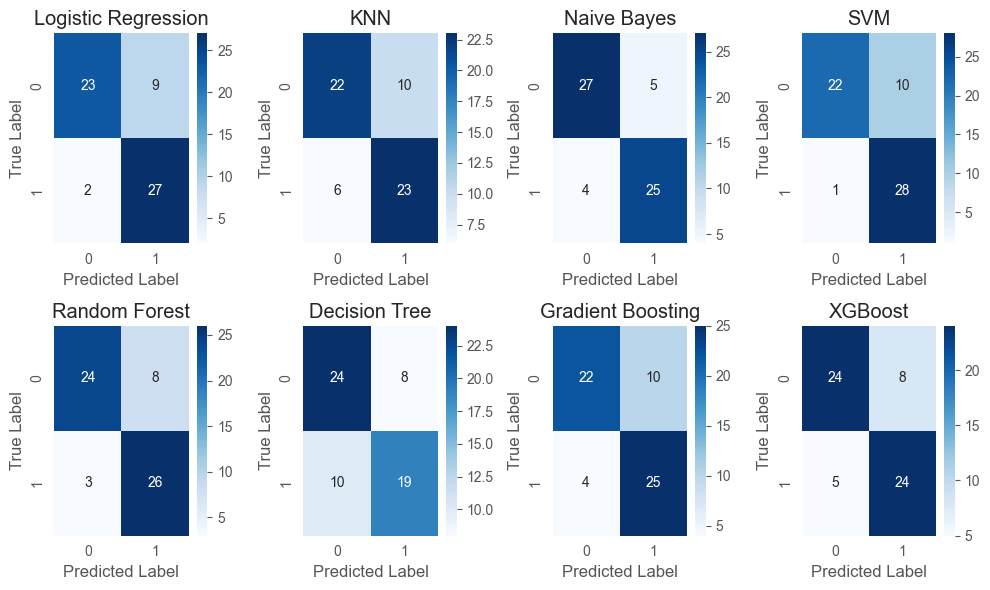

In [213]:
num_models = len(results['model_name'])
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i in range(num_models):
    row = i // 4
    col = i % 4

    sns.heatmap(results['conf_matrix'][i], annot=True, cmap='Blues', fmt='g', ax=axes[row, col])
    axes[row, col].set_title(f'{results["model_name"][i]}')
    axes[row, col].set_xlabel('Predicted Label')
    axes[row, col].set_ylabel('True Label')

plt.tight_layout()
plt.show()

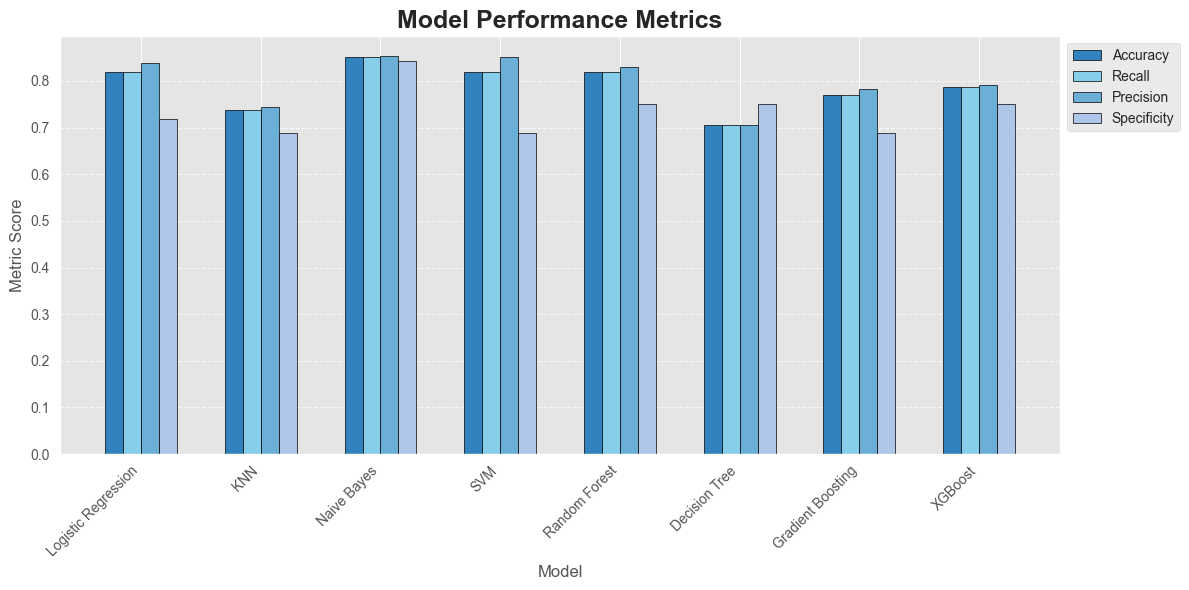

In [221]:
def plot_metrics(model_names, metrics, metric_names, colors):
    num_models = len(model_names)
    num_metrics = len(metric_names)
    bar_width = 0.15
    index = np.arange(num_models)

    plt.figure(figsize=(12, 6))

    for i in range(num_metrics):
        plt.bar(index + i * bar_width, metrics[i], bar_width, label=metric_names[i], color=colors[i], edgecolor='black')

    plt.xlabel('Model')
    plt.ylabel('Metric Score')
    plt.title('Model Performance Metrics', fontsize=18, fontweight='bold')
    plt.xticks(index + (num_metrics - 1) * bar_width / 2, model_names, rotation=45, ha='right')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

model_names = results['model_name']

accuracies = results['accuracy']
recalls = results['recall']
precisions = results['precision']
specificities = results['specificity']

metrics = [accuracies, recalls, precisions, specificities]
metric_names = ['Accuracy', 'Recall', 'Precision', 'Specificity']
colors = ['#3182bd','skyblue','#6baed6','#aec7e8']  

plot_metrics(model_names, metrics, metric_names, colors)